λ_0= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
M_halo_dec = [6.90549008e+19 6.90549008e+19 6.90549008e+19 6.90549008e+19
 6.90549008e+19 6.90549008e+19 6.90549008e+19 6.90549008e+19
 6.90549008e+19 6.90549008e+19 6.90549008e+19 6.90549008e+19
 6.90549008e+19 6.90549008e+19 6.90549008e+19 6.90549008e+19
 6.90549008e+19 6.90549008e+19 6.90549008e+19 6.90549008e+19
 7.53949569e+29 1.00435457e+30 1.25431531e+30 1.50382489e+30
 1.75289943e+30 2.00150900e+30 2.24968812e+30] kg
M_halo_dec/M_PBH = [6.90549008e-13 6.90549008e-13 6.90549008e-13 6.90549008e-13
 6.90549008e-13 6.90549008e-13 6.90549008e-13 6.90549008e-13
 6.90549008e-13 6.90549008e-13 6.90549008e-13 6.90549008e-13
 6.90549008e-13 6.90549008e-13 6.90549008e-13 6.90549008e-13
 6.90549008e-13 6.90549008e-13 6.90549008e-13 6.90549008e-13
 7.53949569e-03 1.00435457e-02 1.25431531e-02 1.5038

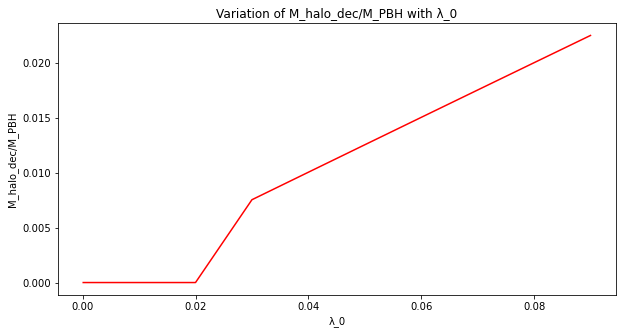

In [32]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping early in the radiation era using eqs.(43),(50) & (53) in reference 
# pdf "PBH binary" .

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math


π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_PBH=1e32            # in kg
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity

def M_r(s):    #Mass of the DM halo given by eq.(43) in reference pdf "PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) #eq.(57) in reference pdf "PBH binary".
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)

λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001, 0.002, 0.003, 0.004,
          0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for λ_0 in λ_list:
    def M_halo_dec(λ_0):
        def f(u,s,λ_0):
             return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]
        separation0= [1e-12,1]
        b= ((3*λ_0)/1000)
        ss= np.linspace(1e-12,((6*λ_0)/3),600000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist() 
        As_list = As.tolist()
        C=zip(As_list,Bs_list)
        for i,C in enumerate(C):
            Δ=(Bs[i] - Bs[i-1])
            if (Δ)<0:
                break
        M_halo_dec=M_r((As[i]*λ_0))
        return M_halo_dec
        λ_0+=0.0001
    
    
M_halo_dec_list = np.zeros(len(λ_list))
M_halo_dec_by_M_PBH=np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     M_halo_dec_list[i] = M_halo_dec(λ_0)
     M_halo_dec_by_M_PBH[i]= ((M_halo_dec(λ_0))/ M_PBH) 
print("λ_0=",λ_list)
print("M_halo_dec =",M_halo_dec_list,"kg") 
print("M_halo_dec/M_PBH =",M_halo_dec_by_M_PBH)
plt.figure(figsize=(10,5))
plt.plot(λ_list,M_halo_dec_by_M_PBH,'r') 
plt.xlabel('λ_0')
plt.ylabel('M_halo_dec/M_PBH')
plt.title('Variation of M_halo_dec/M_PBH with λ_0')
plt.show()

λ_0= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
M_halo_dec = [2.43305019e+31 3.77320207e+31 5.18957183e+31 6.67819755e+31
 4.36566966e+24 5.09328128e+24] kg
M_halo_dec/M_PBH = [2.43305019e-01 3.77320207e-01 5.18957183e-01 6.67819755e-01
 4.36566966e-08 5.09328128e-08]


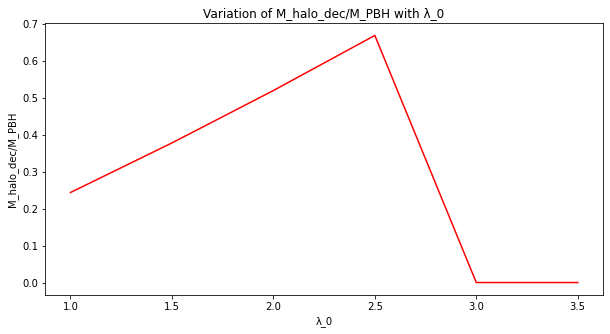

In [30]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping later around matter-radiation equality using eqs.(42),(47)& (53) in reference 
# pdf "PBH binary" .





def M(s):               # Mass of the DM halo given by eq.(42) in reference pdf "PBH binary",
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                    *math.sqrt(s+1))+(4/3)))

def h(x):
    return math.sqrt((x**-3)+(x**-4))   
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+
                                                                        (4/3))))
                    #eq.(56) in reference pdf "PBH binary".

def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
λ_list=[1.0,1.5,2.0,2.5,3.0,3.5]
for λ_0 in λ_list:
    def M_halo_dec(λ_0):
        def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]

        separation0= [1e-12,1]
        b= (2*λ_0)/10000
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist() 
        As_list = As.tolist()
        C=zip(As_list,Bs_list)
        for i,C in enumerate(C):
            Δ=(Bs[i] - Bs[i-1])
            if (Δ)<0:
                break
        M_halo_dec= λ_0*M(As[i])
        return M_halo_dec
        λ_0+=0.5 
    
M_halo_dec_list = np.zeros(len(λ_list))
M_halo_dec_by_M_PBH=np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     M_halo_dec_list[i] = M_halo_dec(λ_0)
     M_halo_dec_by_M_PBH[i]= ((M_halo_dec(λ_0))/ M_PBH) 
print("λ_0=",λ_list)
print("M_halo_dec =",M_halo_dec_list,"kg") 
print("M_halo_dec/M_PBH =",M_halo_dec_by_M_PBH)
plt.figure(figsize=(10,5))
plt.plot(λ_list,M_halo_dec_by_M_PBH,'r') 
plt.xlabel('λ_0')
plt.ylabel('M_halo_dec/M_PBH')
plt.title('Variation of M_halo_dec/M_PBH with λ_0')
plt.show()    